In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parents[1]))
from model import left_right_task as lrt, network_model, util, plot_style

Wji, pset, amp, dur, l_kernel, r_kernel = util.load_fiducial_network(True)

In [3]:
import os
os.getcwd()

'c:\\Users\\caele\\Desktop\\Spring2025\\miller-lab-final\\figures\\figure7'

In [4]:
def plot_reliabilities(ax, path):
    # load reliabilities
    reliabilities = np.load(path + '/reliabilities.npy')
    dur_mesh = np.load(path + '/dur_mesh.npy')
    amp_mesh = np.load(path + '/amp_mesh.npy')
    
    # plot
    c = ax.pcolormesh(dur_mesh, amp_mesh, reliabilities.reshape(dur_mesh.shape), cmap='viridis', shading='auto')
    ax.set_yscale('log')
    ax.set_xlabel(r"$\tau_{dur}$")
    ax.set_ylabel(r"$I_{app}$")
    
    return c


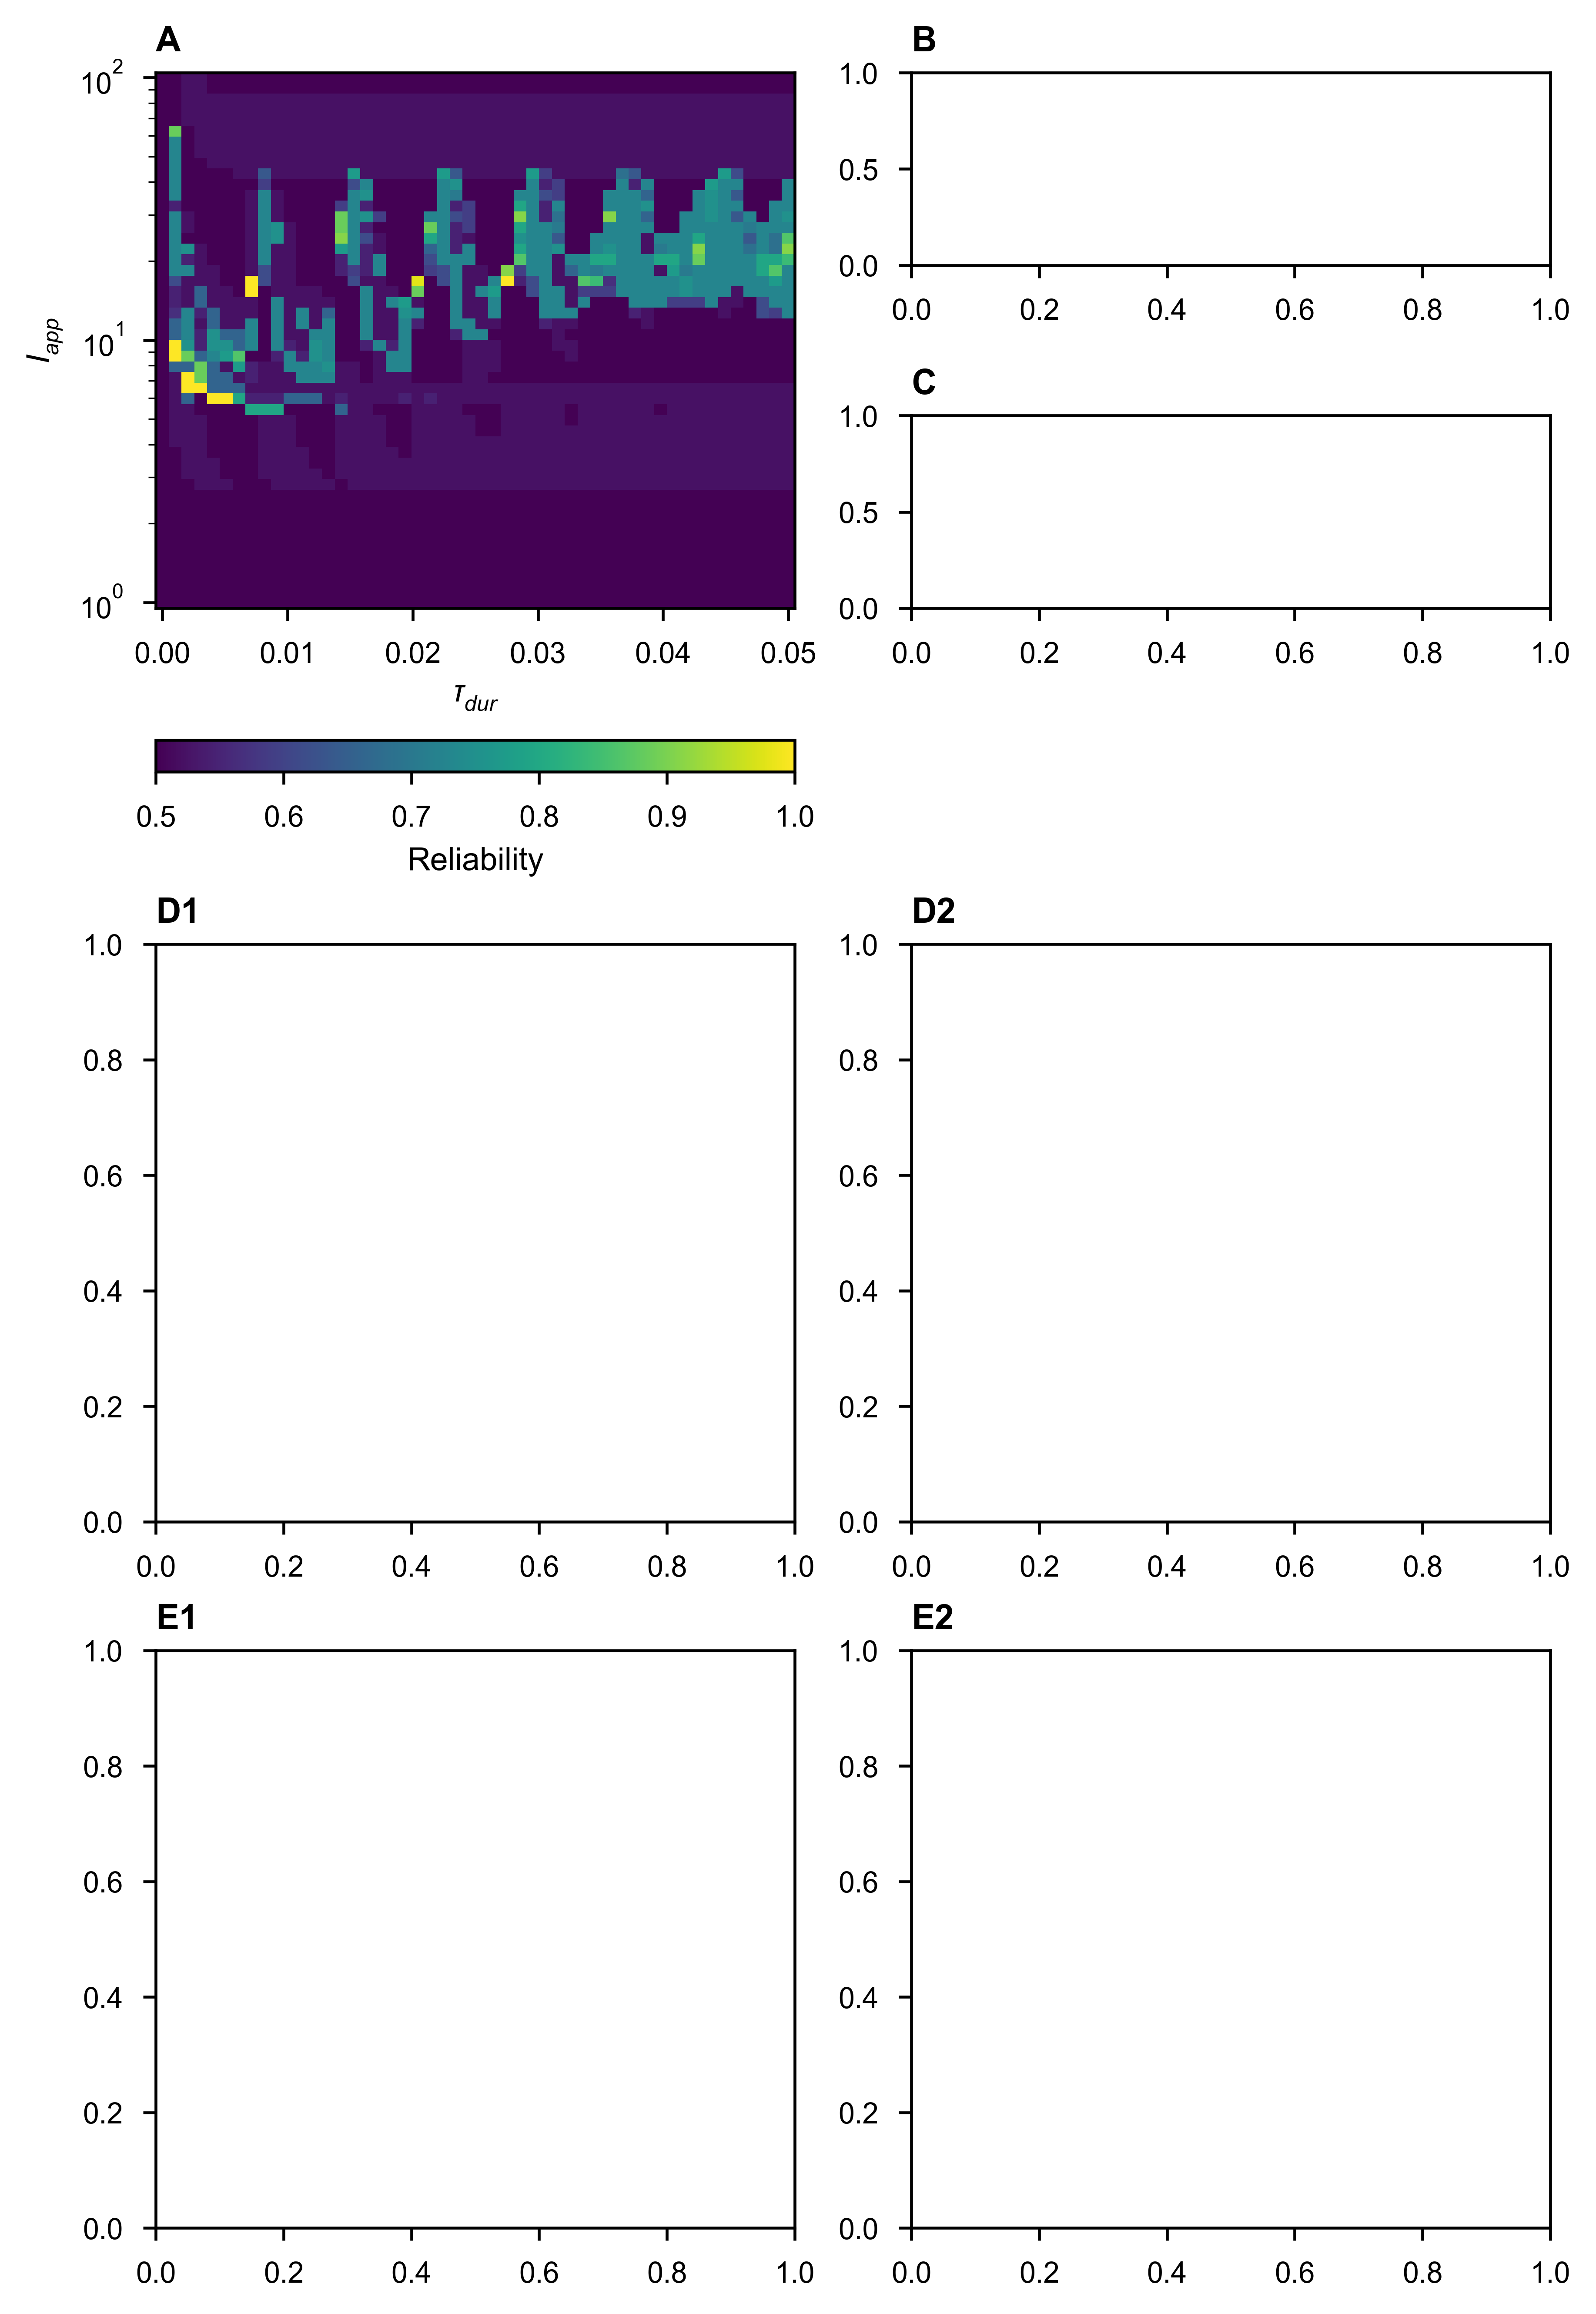

In [41]:
MIN_WIDTH = 1578    # in pixels at 600 dpi
MAX_WIDTH = 4500
MAX_HEIGHT = 5250

px = 1/plt.rcParams['figure.dpi']   # convert pixel to inches
fig = plt.figure(layout='constrained', figsize=(MAX_WIDTH*0.8*px, MAX_HEIGHT*px))
axd = fig.subplot_mosaic(
    """
    AB
    AC
    Dd
    Ee
    """,
    height_ratios=[1,1,3,3]
)
label_dict = {l: l for l in axd.keys()}
label_dict['E'] = 'E1'
label_dict['e'] = 'E2'
label_dict['D'] = 'D1'
label_dict['d'] = 'D2'
for label, ax in axd.items():    
    ax.set_title(label_dict[label], loc='left', fontweight='bold')

c = plot_reliabilities(axd['A'], 'data_7A')
cbar = fig.colorbar(c, ax=axd['A'], location='bottom')
cbar.set_label('Reliability')

In [51]:
amps = np.load('data_7BE/amps.npy')
kernel_ids = np.load('data_7BE/kernel_ids.npy')
p_curves = np.load('data_7BE/p_curves.npy')
reliabilities = np.load('data_7BE/reliabilities.npy')
df_decisions = pd.read_csv('data_7BE/decision_dicts.csv')

In [48]:
print(amps.shape, kernel_ids.shape, p_curves.shape, reliabilities.shape, df_decisions.shape)

(110,) (110,) (110, 7) (110,) (64, 110)


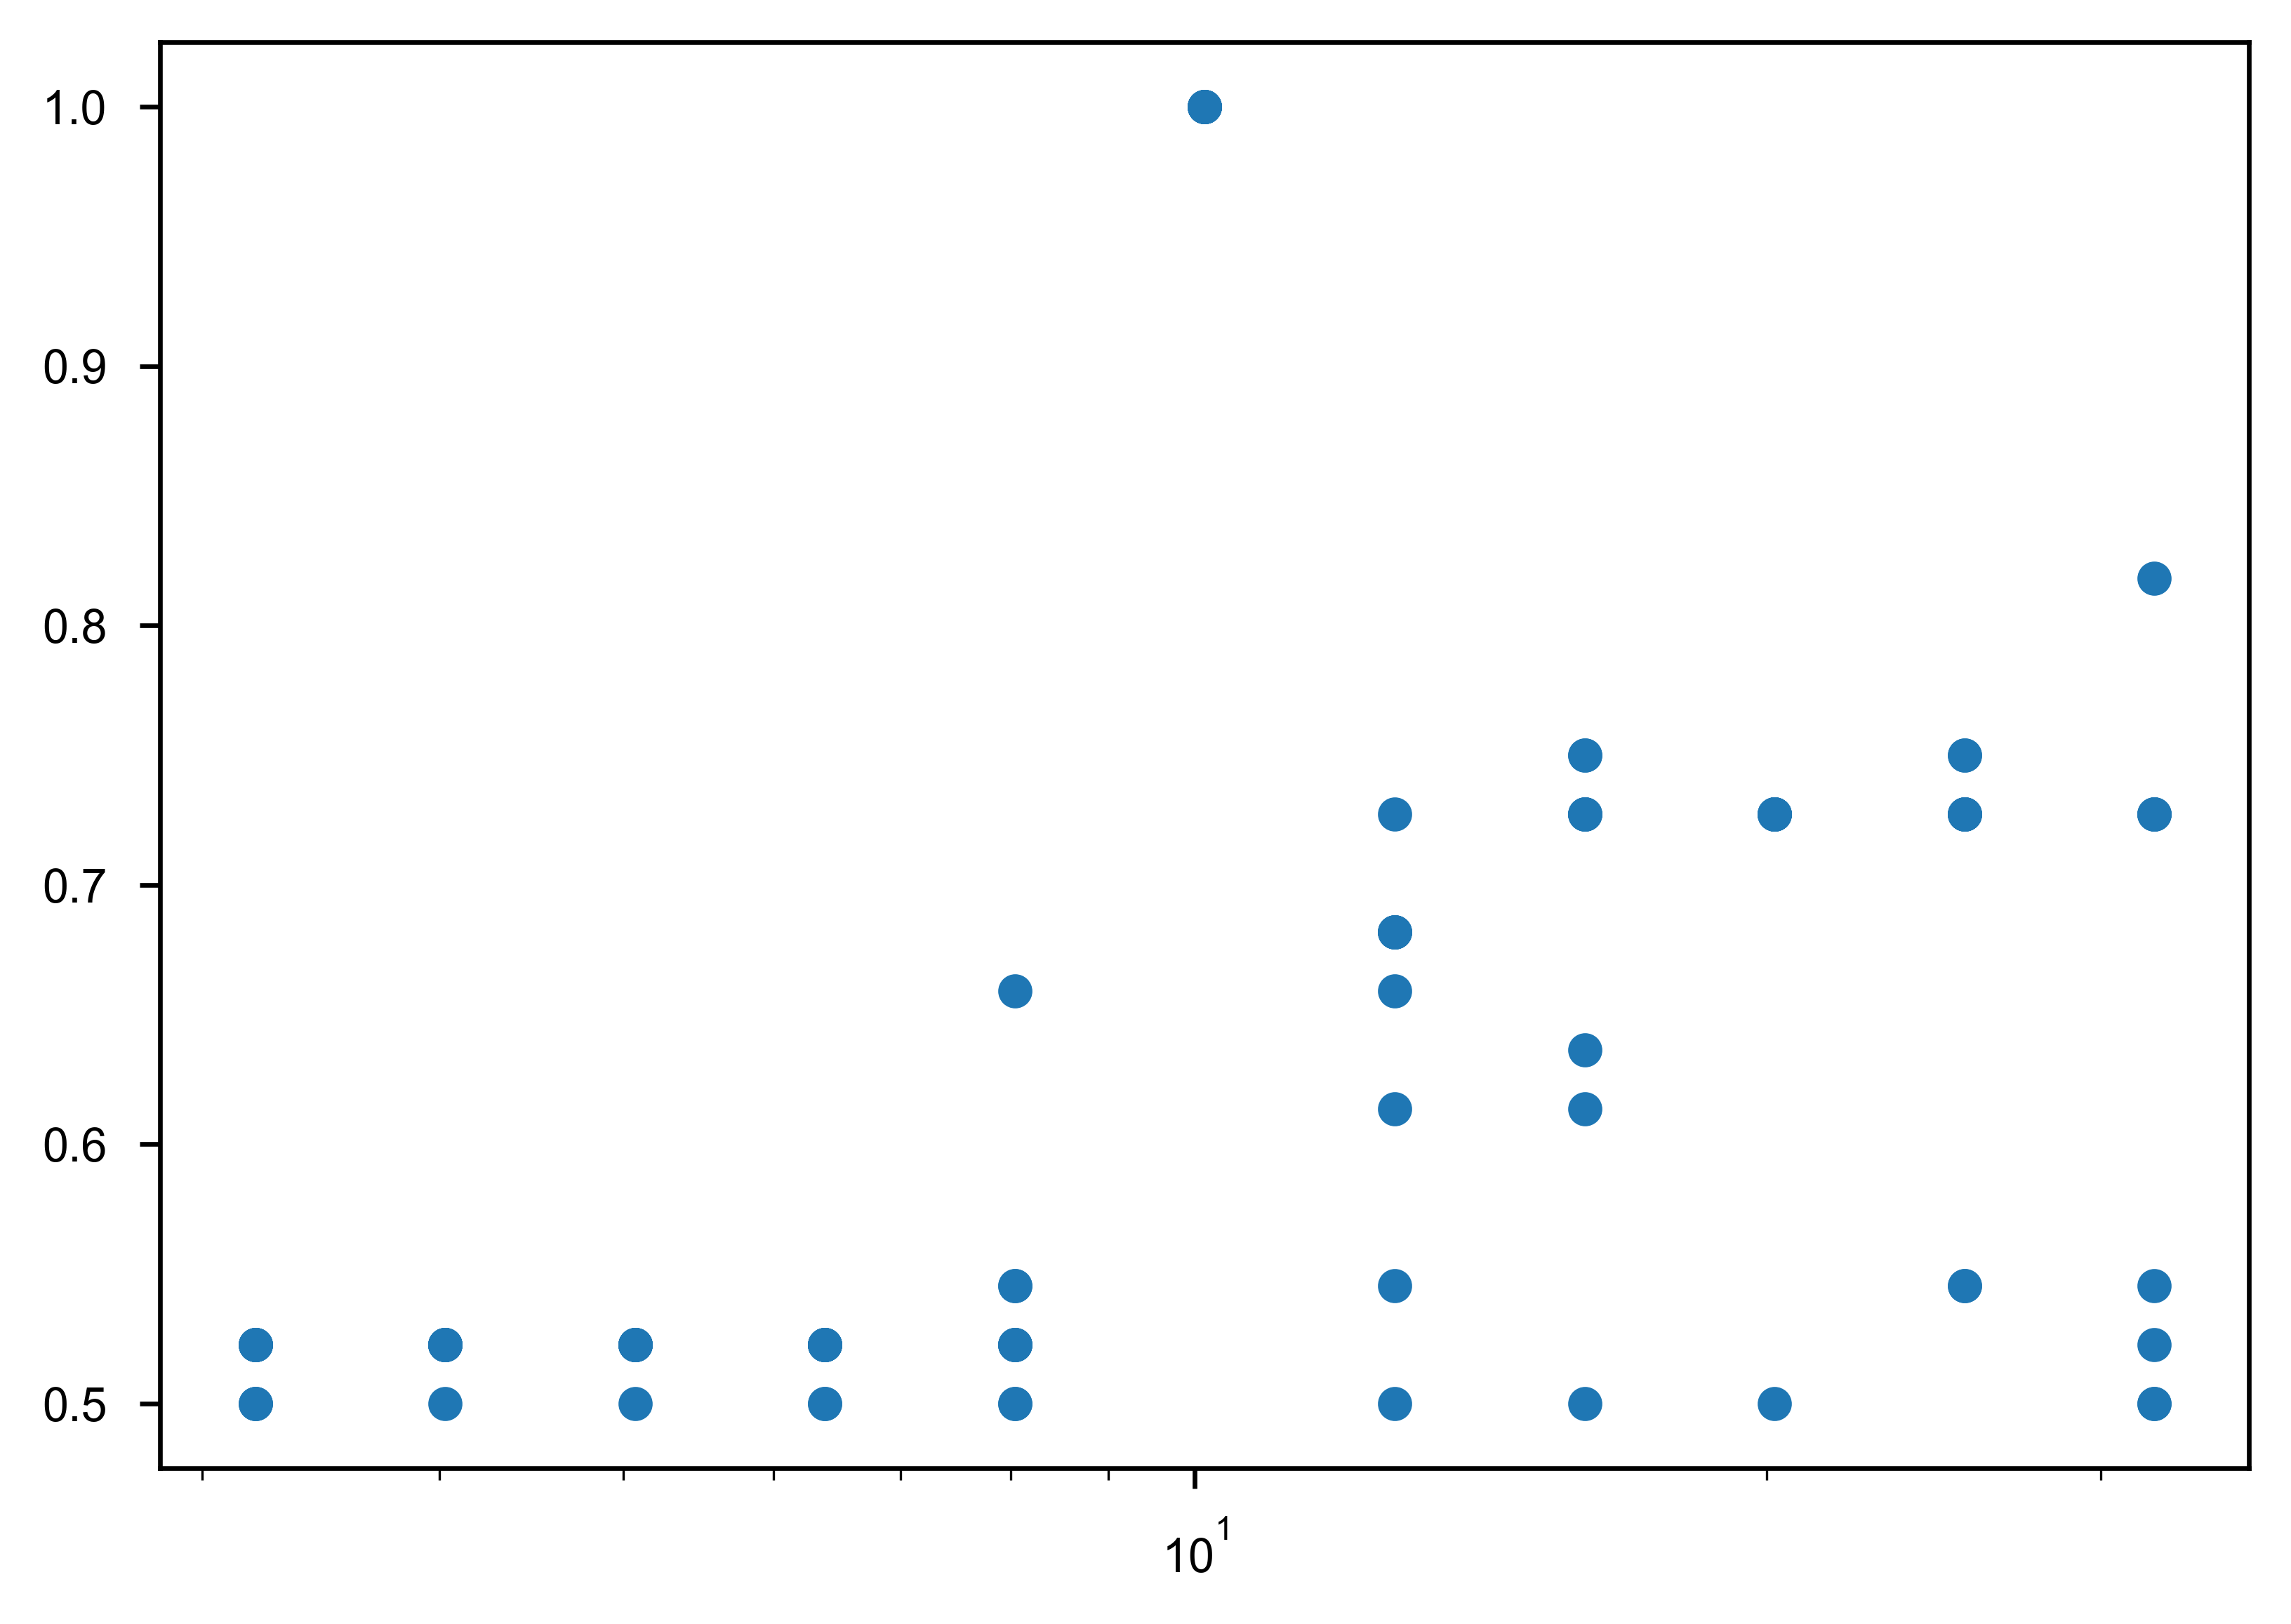

In [47]:
plt.scatter(amps, reliabilities)
plt.xscale('log')